In [77]:
import pandas as pd
import re

In [59]:
df = pd.read_csv("car_price_prediction.csv")

In [180]:
df = df.drop_duplicates()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [61]:
df["Color"].value_counts()

Black            5033
White            4489
Silver           3792
Grey             2375
Blue             1396
Red               639
Green             322
Orange            253
Brown             187
Carnelian red     179
Golden            145
Beige             134
Sky blue          122
Yellow            106
Purple             39
Pink               26
Name: Color, dtype: int64

In [62]:
df["Levy"].describe()

count     19237
unique      559
top           -
freq       5819
Name: Levy, dtype: object

In [63]:
df["Price"].describe()

count    1.923700e+04
mean     1.855593e+04
std      1.905813e+05
min      1.000000e+00
25%      5.331000e+03
50%      1.317200e+04
75%      2.207500e+04
max      2.630750e+07
Name: Price, dtype: float64

In [64]:
df[df["Levy"]=="-"]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
11,45814819,8781,-,FORD,Transit,1999,Microbus,No,CNG,4,0 km,8.0,Manual,Rear,02-Mar,Left wheel,Blue,0
12,45815568,3000,-,OPEL,Vectra,1997,Goods wagon,No,CNG,1.6,350000 km,4.0,Manual,Front,04-May,Left wheel,White,4
23,45814106,7840,-,FORD,Transit,2001,Microbus,No,Diesel,2.0 Turbo,230000 km,4.0,Manual,Front,02-Mar,Left wheel,White,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19223,44571028,8781,-,DODGE,Caliber,2008,Hatchback,No,Petrol,2.4,0 km,4.0,Automatic,Front,04-May,Left wheel,Blue,4
19224,45768089,19130,-,KIA,Optima ex,2014,Sedan,Yes,Petrol,2.4,35800 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
19226,45796788,7840,-,NISSAN,Skyline,2003,Sedan,Yes,Petrol,3,220000 km,6.0,Tiptronic,Rear,04-May,Right-hand drive,White,0
19229,39977395,50,-,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000 km,4.0,Automatic,Front,04-May,Left wheel,Silver,6


In [65]:
len(df[df["Levy"] == "-"])

5819

In [66]:
len(df[df["Levy"] == "0"])

0

In [67]:
df["Levy"].value_counts()

-       5819
765      486
891      461
639      410
640      405
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64

In [70]:
df["Levy"].replace("-", 0, inplace= True)

In [71]:
df["Levy"]

0        1399
1        1018
2           0
3         862
4         446
         ... 
19232       0
19233     831
19234     836
19235    1288
19236     753
Name: Levy, Length: 19237, dtype: object

In [72]:
df["Levy_cleaned"] = df["Levy"].astype(int)

In [73]:
df[["Levy", "Levy_cleaned"]]

,Levy,Levy_cleaned
0,1399,1399
1,1018,1018
2,0,0
3,862,862
4,446,446
...,...,...
19232,0,0
19233,831,831
19234,836,836
19235,1288,1288


In [40]:
df["Doors"].value_counts()

04-May    18332
02-Mar      777
>5          128
Name: Doors, dtype: int64

In [28]:
doors_dict = {"02-Mar": 0, "04-May": 1, ">5": 2}

In [41]:
df["Doors_encoded"] = df["Doors"].map(doors_dict)

In [43]:
df[["Doors", "Doors_encoded"]]

,Doors,Doors_encoded
0,04-May,1
1,04-May,1
2,04-May,1
3,04-May,1
4,04-May,1
...,...,...
19232,02-Mar,0
19233,04-May,1
19234,04-May,1
19235,04-May,1


In [75]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Levy_cleaned
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,1399
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,1018
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,0
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,862
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,446


In [76]:
df["Mileage"]

0        186005 km
1        192000 km
2        200000 km
3        168966 km
4         91901 km
           ...    
19232    300000 km
19233    161600 km
19234    116365 km
19235     51258 km
19236    186923 km
Name: Mileage, Length: 19237, dtype: object

In [84]:
int(re.split("\D+", df["Mileage"][0])[0])

186005

In [88]:
re.findall('[0-9]+', df["Mileage"][0])

['186005']

In [90]:
# Removed "km" from Mileage column
df["Mileage_cleaned"] = df["Mileage"].apply(lambda x: int(re.findall('[0-9]+', x)[0]))

In [93]:
df["Leather interior"]

0        Yes
1         No
2         No
3        Yes
4        Yes
        ... 
19232    Yes
19233    Yes
19234    Yes
19235    Yes
19236    Yes
Name: Leather interior, Length: 19237, dtype: object

In [96]:
df["Engine volume"].value_counts()

2            3916
2.5          2277
1.8          1760
1.6          1462
1.5          1321
             ... 
6.8             1
6.7             1
3.1             1
0.8 Turbo       1
1.1 Turbo       1
Name: Engine volume, Length: 107, dtype: int64

In [99]:
df["Engine volume"].isnull().sum()

0

In [101]:
df["Engine volume"]

0              3.5
1                3
2              1.3
3              2.5
4              1.3
           ...    
19232    2.0 Turbo
19233          2.4
19234            2
19235            2
19236          2.4
Name: Engine volume, Length: 19237, dtype: object

In [122]:
df["Engine volume"][19232]

'2.0 Turbo'

In [127]:
if re.findall('Turbo', df["Engine volume"][19232]) == ["Turbo"]:
    print(True)
else:
    print(False)

True


In [128]:
df["Turbo"] = df["Engine volume"].map(lambda x: True if re.findall('Turbo', x) == ["Turbo"] else False)

In [130]:
df[["Turbo", "Engine volume"]]

,Turbo,Engine volume
0,False,3.5
1,False,3
2,False,1.3
3,False,2.5
4,False,1.3
...,...,...
19232,True,2.0 Turbo
19233,False,2.4
19234,False,2
19235,False,2


In [155]:
float(re.findall("\d+\.\d+", df["Engine volume"][0])[0])

3.5

In [156]:
float(re.findall("\d+\.\d+", df["Engine volume"][0])[0])

3.5

In [151]:
re.findall("[0-9]+", df["Engine volume"][1])

['3']

In [166]:
df["Engine volume_cleaned"] = df["Engine volume"].str.replace("Turbo", "").astype(float)

In [169]:
df[df["Engine volume_cleaned"] >8]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Levy_cleaned,Mileage_cleaned,Turbo,Engine volume_cleaned
2357,45803214,10036,5603,HYUNDAI,Sonata,2014,Sedan,Yes,LPG,20,...,Automatic,Front,04-May,Left wheel,Silver,4,5603,333686,False,20.0
17777,45732659,10036,5603,HYUNDAI,Sonata,2014,Sedan,Yes,LPG,20,...,Automatic,Front,04-May,Left wheel,Silver,4,5603,333686,False,20.0


<AxesSubplot:>

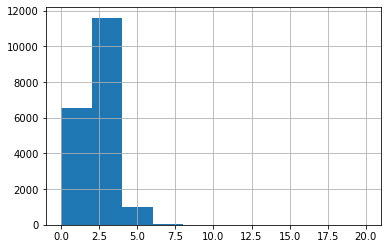

In [170]:
df["Engine volume_cleaned"].hist()

In [181]:
df[df["Engine volume"]=="20"]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Levy_cleaned,Mileage_cleaned,Turbo,Engine volume_cleaned
2357,45803214,10036,5603,HYUNDAI,Sonata,2014,Sedan,Yes,LPG,20,...,Automatic,Front,04-May,Left wheel,Silver,4,5603,333686,False,20.0
17777,45732659,10036,5603,HYUNDAI,Sonata,2014,Sedan,Yes,LPG,20,...,Automatic,Front,04-May,Left wheel,Silver,4,5603,333686,False,20.0


In [182]:
df["ID"].value_counts()

45654403    1
45802973    1
45769757    1
45792992    1
45776193    1
           ..
45659914    1
45728551    1
45758183    1
45797245    1
45813273    1
Name: ID, Length: 18924, dtype: int64

In [183]:
df[df["ID"] == 45815365]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Levy_cleaned,Mileage_cleaned,Turbo,Engine volume_cleaned
2767,45815365,7213,0,MAZDA,Demio evropuli,2003,Hatchback,No,CNG,1.4,...,Manual,Front,04-May,Left wheel,Blue,4,0,185000,False,1.4


In [186]:
df["Price"].describe()

count    1.892400e+04
mean     1.858744e+04
std      1.921356e+05
min      1.000000e+00
25%      5.331000e+03
50%      1.317200e+04
75%      2.206300e+04
max      2.630750e+07
Name: Price, dtype: float64

In [193]:
df[df["Price"] > 50000]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Levy_cleaned,Mileage_cleaned,Turbo,Engine volume_cleaned
14,45732604,59464,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,...,Automatic,Front,04-May,Left wheel,White,4,891,76000,False,2.0
36,45369569,51746,1077,TOYOTA,CHR Limited,2019,Jeep,No,Petrol,2,...,Tiptronic,Front,04-May,Left wheel,Red,12,1077,10200,False,2.0
47,45732544,55390,1017,HYUNDAI,Santa FE,2017,Jeep,Yes,Diesel,2,...,Automatic,Front,04-May,Left wheel,Black,4,1017,100734,False,2.0
56,44316016,87112,0,MERCEDES-BENZ,GLA 250,2019,Jeep,Yes,Petrol,2.0 Turbo,...,Tiptronic,4x4,04-May,Left wheel,Grey,0,0,5323,True,2.0
73,45732043,53154,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,...,Automatic,Front,04-May,Left wheel,Silver,4,891,84506,False,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19144,45733642,56814,1017,HYUNDAI,Sonata,2017,Sedan,Yes,Petrol,2,...,Automatic,Front,04-May,Left wheel,Black,4,1017,67365,False,2.0
19161,45677230,64290,0,LEXUS,RX 450 F SPORT,2012,Jeep,Yes,Hybrid,3.5,...,Variator,4x4,04-May,Left wheel,Black,12,0,97000,False,3.5
19180,45803164,63886,1076,HYUNDAI,Sonata,2020,Sedan,Yes,LPG,2,...,Automatic,Front,04-May,Left wheel,Silver,4,1076,5305,False,2.0
19188,45571892,61154,579,TOYOTA,RAV 4,2017,Jeep,No,Hybrid,2.5,...,Tiptronic,4x4,04-May,Left wheel,White,12,579,71234,False,2.5


<AxesSubplot:>

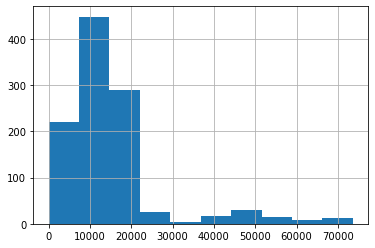

In [197]:
df[df["Model"]=="Sonata"]["Price"].hist()

In [192]:
df[df["Model"]=="Prius"]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Levy_cleaned,Mileage_cleaned,Turbo,Engine volume_cleaned
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,...,Automatic,Front,04-May,Left wheel,White,12,761,258909,False,1.8
21,45168471,20698,586,TOYOTA,Prius,2012,Sedan,Yes,Plug-in Hybrid,1.8,...,Automatic,Front,04-May,Left wheel,White,12,586,187000,False,1.8
27,45804684,30,0,TOYOTA,Prius,2008,Sedan,No,Hybrid,1.5,...,Automatic,Front,04-May,Left wheel,White,8,0,169000,False,1.5
74,45816646,14740,645,TOYOTA,Prius,2011,Hatchback,No,Hybrid,1.8,...,Automatic,Front,04-May,Left wheel,White,8,645,288000,False,1.8
77,45787521,18189,0,TOYOTA,Prius,2012,Sedan,No,Petrol,1.8,...,Automatic,Front,04-May,Left wheel,Silver,8,0,175000,False,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19197,45807914,13799,586,TOYOTA,Prius,2012,Hatchback,Yes,Hybrid,1.8,...,Automatic,Front,04-May,Left wheel,Black,12,586,260000,False,1.8
19213,45657109,6586,988,TOYOTA,Prius,2007,Sedan,No,Hybrid,1.5,...,Automatic,Front,04-May,Left wheel,Brown,8,988,158130,False,1.5
19219,45789241,19444,0,TOYOTA,Prius,2013,Sedan,No,Hybrid,1.8,...,Automatic,Front,04-May,Left wheel,Grey,12,0,140607,False,1.8
19229,39977395,50,0,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,...,Automatic,Front,04-May,Left wheel,Silver,6,0,150000,False,1.5
